# Climate Change Analysis

In [1]:
#import required libraries & Modules
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
print(df.dtypes)
print("Shape of data : ",df.shape)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object
Shape of data :  (645675, 5)


In [4]:
#No of Country and state
df['Country'].nunique() , df['State'].nunique()

(7, 241)

In [5]:
df['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

## Select India for time-series analysis

In [6]:
df_ind=df[(df['Country'] == 'India')]

In [7]:
df_ind['State'].unique()

array(['Andaman And Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [8]:
df_maha = df_ind[(df_ind['State'] == 'Maharashtra')]

In [9]:
df_maha.shape

(2613, 5)

In [10]:
#Rename the columns
df_maha.rename(columns={'dt':'Date'},inplace=True)

In [11]:
# make Date column  index
df_maha['Date']=pd.to_datetime(df_maha['Date'])
df_maha.set_index('Date',inplace=True)
df_maha.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq=None)

In [12]:
df_maha.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
Date,,,,
1796-01-01,21.195,2.134,Maharashtra,India
1796-02-01,23.250,1.385,Maharashtra,India
1796-03-01,26.075,2.237,Maharashtra,India
1796-04-01,30.374,1.605,Maharashtra,India
1796-05-01,32.132,1.340,Maharashtra,India


In [13]:
#Find the missing value  
df_maha.isnull().sum()

AverageTemperature               105
AverageTemperatureUncertainty    105
State                              0
Country                            0
dtype: int64

## fill misssing value with Rolling average

In [14]:

df_maha['new_avg']= df_maha.AverageTemperature.fillna(df_maha.AverageTemperature.rolling(12,center=True,min_periods=1).mean())

In [15]:
df_maha.isnull().sum()

AverageTemperature               105
AverageTemperatureUncertainty    105
State                              0
Country                            0
new_avg                           71
dtype: int64

In [16]:
df_maha.index.min(),df_maha.index.max()

(Timestamp('1796-01-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [17]:
df_maha.loc['1805':'1820','new_avg'].isnull().sum()

49

In [18]:
df_maha.loc['1862':'1864','new_avg'].isnull().sum()

22

In [19]:
# As between 1862-1864 there are missing value select time-series from 1865

In [20]:
latest_df= df_maha.loc['1865':'2013']

In [21]:
latest_df['new_avg'].isnull().sum()

0

In [22]:
#take data between 1865 to 2013 for analysis

latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,new_avg
Date,,,,,
1865-01-01,21.672,1.255,Maharashtra,India,21.672
1865-02-01,23.269,2.237,Maharashtra,India,23.269
1865-03-01,26.381,1.341,Maharashtra,India,26.381
1865-04-01,30.169,1.490,Maharashtra,India,30.169
1865-05-01,31.595,1.656,Maharashtra,India,31.595


In [23]:
latest_df.shape

(1785, 5)

In [24]:
#Rename the columns
latest_df.rename(columns={'new_avg':'Avg_Temp'},inplace=True)

In [25]:
#Resample
resample_df=latest_df[['Avg_Temp']]
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [26]:
resample_df.index.min(),resample_df.index.max()


(Timestamp('1865-01-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [27]:
resample_df.shape

(1785, 1)

In [28]:
resample_df.describe()

,Avg_Temp
count,1785.000000
mean,26.113357
std,3.465049
min,18.115000
25%,23.393000
50%,26.057000
75%,28.417000
max,33.801000


In [29]:
resample_df.isnull().sum()

Avg_Temp    0
dtype: int64

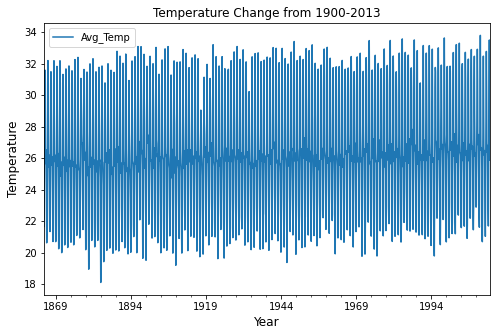

In [30]:
#Plot 
resample_df.plot(title='Temperature Change from 1900-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# Climate change forcasting


# ARIMA

In [31]:
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [32]:
resample_df.shape

(1785, 1)

In [33]:
#AUTO ARIMA
!pip install pmdarima

In [34]:
y=resample_df.Avg_Temp.values

In [35]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [36]:
train, test = train_test_split(resample_df, train_size=int(0.9 * resample_df.shape[0]))

In [37]:
train.shape,test.shape

((1606, 1), (179, 1))

In [38]:
# Fit your model
model = pm.auto_arima( train, start_p=5, max_p=10, seasonal=True, trace = True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=6379.551, Time=5.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7393.557, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6893.574, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6811.365, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7391.560, Time=0.10 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6401.124, Time=2.61 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6408.246, Time=2.08 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=5722.736, Time=7.30 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.21 sec
 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(6,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.84 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=5152.742, Time=6.67 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=6124.180, Time=1.26 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=4712.443, T

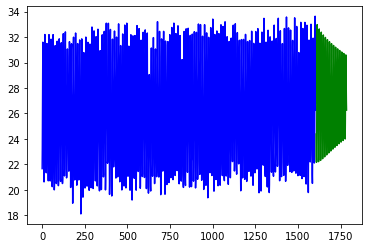

In [39]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(resample_df.shape[0])
plt.plot(x[:1606], train, c='blue')
plt.plot(x[1606:], forecasts, c='green')
plt.show()

In [40]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [41]:
train_size = int(0.9 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

In [42]:
model = ARIMA(train, order=(2,1,5))#order is p,d,q #0,1,1
model_fit = model.fit()
output = model_fit.forecast(test_size)
output

1998-11-01    23.917525
1998-12-01    22.388751
1999-01-01    22.344618
1999-02-01    24.086025
1999-03-01    26.323044
                ...    
2013-05-01    27.109680
2013-06-01    27.117426
2013-07-01    26.839603
2013-08-01    26.354919
2013-09-01    25.796024
Freq: MS, Name: predicted_mean, Length: 179, dtype: float64

In [43]:
output[0]

23.91752474758511

In [44]:
mean_squared_error(test,output)

5.360504336094743

In [45]:
mean_squared_error(test,output)**0.5

2.3152762980030577

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,output)

0.0678590489023638

#  Apply regression on TS using lag values

In [47]:
reg_data=resample_df.copy()

In [48]:
reg_data.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [49]:
reg_data.shape

(1785, 1)

In [50]:
reg_data.columns

Index(['Avg_Temp'], dtype='object')

In [51]:
reg_data['lag1']=reg_data['Avg_Temp'].shift(1)
reg_data['lag2']=reg_data['Avg_Temp'].shift(2)
reg_data['lag3']=reg_data['Avg_Temp'].shift(3)
reg_data['lag4']=reg_data['Avg_Temp'].shift(4)
reg_data['lag5']=reg_data['Avg_Temp'].shift(5)

In [52]:
reg_data.head(10)

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1865-01-01,21.672,NaN,NaN,NaN,NaN,NaN
1865-02-01,23.269,21.672,NaN,NaN,NaN,NaN
1865-03-01,26.381,23.269,21.672,NaN,NaN,NaN
1865-04-01,30.169,26.381,23.269,21.672,NaN,NaN
1865-05-01,31.595,30.169,26.381,23.269,21.672,NaN
1865-06-01,29.872,31.595,30.169,26.381,23.269,21.672
1865-07-01,26.461,29.872,31.595,30.169,26.381,23.269
1865-08-01,25.665,26.461,29.872,31.595,30.169,26.381
1865-09-01,26.528,25.665,26.461,29.872,31.595,30.169


In [53]:
df_r=reg_data.loc['1865-06-01':,:]

In [54]:
df_r.shape

(1780, 6)

In [55]:
df_r.columns

Index(['Avg_Temp', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'], dtype='object')

In [56]:
df_r.head()

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1865-06-01,29.872,31.595,30.169,26.381,23.269,21.672
1865-07-01,26.461,29.872,31.595,30.169,26.381,23.269
1865-08-01,25.665,26.461,29.872,31.595,30.169,26.381
1865-09-01,26.528,25.665,26.461,29.872,31.595,30.169
1865-10-01,25.409,26.528,25.665,26.461,29.872,31.595


#  X & Y split 

In [57]:
X = df_r.drop(['Avg_Temp'],axis=1)
Y = df_r['Avg_Temp']

In [58]:
X.shape, Y.shape

((1780, 5), (1780,))

In [59]:
size = int(len(X) * 0.9)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train, Y_test = Y[0:size], Y[size:len(X)]

In [60]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((1602, 5), (178, 5), (1602,), (178,))

#  Apply regression algorithm

## Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression().fit(X_train, Y_train)

In [63]:
Y_pred = reg.predict(X_test)

In [64]:
mean_squared_error(Y_test,Y_pred)

2.108271604637158

In [65]:
mean_squared_error(Y_test,Y_pred)**0.5

1.4519888445291713

In [66]:
mean_absolute_percentage_error(Y_test,Y_pred)

0.044566891867486705

## RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [68]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=7)

In [69]:
Y_pred_rfr = rfr.predict(X_test)

In [70]:
mean_squared_error(Y_test,Y_pred_rfr)

0.7370243491028062

In [71]:
mean_squared_error(Y_test,Y_pred_rfr)**0.5

0.8585012225400767

In [72]:
mean_absolute_percentage_error(Y_test,Y_pred_rfr)

0.02466315438824934

# LSTM_Time_series

In [73]:
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


<AxesSubplot:xlabel='Date'>

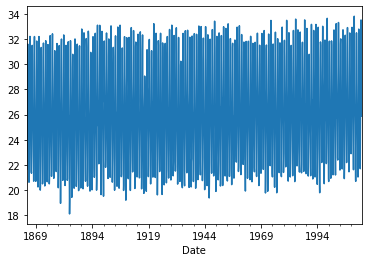

In [74]:
resample_df['Avg_Temp'].plot()

In [75]:
lstm_data=resample_df[['Avg_Temp']].copy()

In [76]:
lstm_data.shape

(1785, 1)

In [77]:
lstm_data.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [78]:
dataset_train = lstm_data.iloc[:2565,:]
dataset_train.shape

(1785, 1)

In [79]:
# Convert data frame / series to numpy array
training_set = dataset_train.iloc[:, 0].values
training_set[:5]

array([21.672, 23.269, 26.381, 30.169, 31.595])

In [80]:
training_set.shape

(1785,)

# Add extra dimemsion to the data for processing in RNN / LSTM neuron

In [81]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [82]:
training_set[:5]

array([[21.672],
       [23.269],
       [26.381],
       [30.169],
       [31.595]])

In [83]:
training_set.shape

(1785, 1)

<AxesSubplot:>

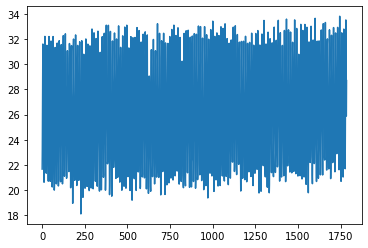

In [84]:
pd.Series(training_set.flat).plot()

In [85]:
#Transform time series for having lag values and output variable

In [123]:
timesteps=5 # How many lag Values to train the data
trn_size = dataset_train.shape[0]

In [147]:
# add lag values to train dataset
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [148]:
X_train.shape

(1780, 5)

In [149]:
y_train.shape

(1780,)

In [150]:
X_train[:1]

array([[21.672, 23.269, 26.381, 30.169, 31.595]])

In [151]:
y_train[:1]

array([29.872])

In [152]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,21.672,23.269,26.381,30.169,31.595
1,23.269,26.381,30.169,31.595,29.872
2,26.381,30.169,31.595,29.872,26.461
3,30.169,31.595,29.872,26.461,25.665
4,31.595,29.872,26.461,25.665,26.528


## Reshape X_train to add extra dimension

In [153]:
#It is added to be processed easily by RNN / LSTM
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [154]:
X_train.shape

(1780, 5, 1)

In [155]:
X_train[:1]

array([[[21.672],
        [23.269],
        [26.381],
        [30.169],
        [31.595]]])

## Building the LSTM

In [156]:
import tensorflow as tf
from tensorflow import keras

In [157]:
type(X_train)

numpy.ndarray

In [158]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

In [159]:
#create the model

model_lstm = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm.add(keras.layers.LSTM(units=10,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [160]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10)                480       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [161]:
history = model_lstm.fit( X_train, y_train, validation_split=0.1,epochs = 50, batch_size = 10)

Epoch 1/50
161/161 [==============================] - 4s 10ms/step - loss: 601.1663 - val_loss: 534.4624
Epoch 2/50
161/161 [==============================] - 1s 4ms/step - loss: 458.7827 - val_loss: 421.1705
Epoch 3/50
161/161 [==============================] - 1s 5ms/step - loss: 338.0084 - val_loss: 313.8995
Epoch 4/50
161/161 [==============================] - 1s 5ms/step - loss: 264.6457 - val_loss: 256.6476
Epoch 5/50
161/161 [==============================] - 1s 8ms/step - loss: 215.1311 - val_loss: 210.0347
Epoch 6/50
161/161 [==============================] - 1s 6ms/step - loss: 174.5254 - val_loss: 171.2977
Epoch 7/50
161/161 [==============================] - 1s 6ms/step - loss: 140.8143 - val_loss: 138.9171
Epoch 8/50
161/161 [==============================] - 1s 7ms/step - loss: 112.9715 - val_loss: 112.1320
Epoch 9/50
161/161 [==============================] - 1s 6ms/step - loss: 90.0054 - val_loss: 89.9678
Epoch 10/50
161/161 [==============================] - 1s 5ms/ste

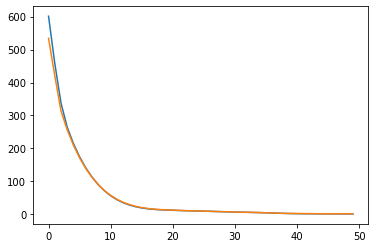

In [162]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#  Tunning LSTM

In [163]:
#create the model

model_lstm1 = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm1.add(keras.layers.LSTM(units=20,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm1.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [164]:
model_lstm1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 20)                1760      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [167]:
history1 = model_lstm1.fit( X_train, y_train, validation_split=0.1,epochs = 100, batch_size = 20)

Epoch 1/100
81/81 [==============================] - 0s 6ms/step - loss: 2.9023 - val_loss: 2.9697
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 2.5489 - val_loss: 2.5910
Epoch 3/100
81/81 [==============================] - 1s 11ms/step - loss: 2.2430 - val_loss: 2.7036
Epoch 4/100
81/81 [==============================] - 1s 11ms/step - loss: 1.9433 - val_loss: 2.2555
Epoch 5/100
81/81 [==============================] - 0s 6ms/step - loss: 1.6960 - val_loss: 1.8036
Epoch 6/100
81/81 [==============================] - 1s 11ms/step - loss: 1.4923 - val_loss: 1.8004
Epoch 7/100
81/81 [==============================] - 1s 8ms/step - loss: 1.3651 - val_loss: 1.5960
Epoch 8/100
81/81 [==============================] - 1s 11ms/step - loss: 1.2286 - val_loss: 1.4791
Epoch 9/100
81/81 [==============================] - 0s 5ms/step - loss: 1.0981 - val_loss: 1.3750
Epoch 10/100
81/81 [==============================] - 0s 5ms/step - loss: 1.0507 - val_loss: 1.5183
Epoch

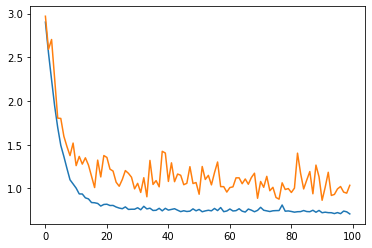

In [168]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# Prophet

In [107]:
# !pip install pystan fbprophet

In [108]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
resample_df.head()

In [ ]:
pro_data=resample_df.copy()

In [ ]:
pro_data.reset_index(level=0, inplace=True)

In [ ]:
pro_data.rename(columns={'Date':'ds','Avg_temp':'y'},inplace=True)

In [ ]:
pro_data.head()

In [ ]:
pro_data.shape

In [ ]:
pro_data.dtypes

In [ ]:
m = Prophet()
m.fit(pro_data)


In [ ]:
future = m.make_future_dataframe(periods=12)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
fig1 = m.plot(forecast)